In [64]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

df = pd.read_csv('../65 Years of Weather Data Bangladesh (1948 - 2013).csv')

In [65]:
df = df.drop(labels=["No","YEAR","Month","ALT"], axis=1)
df.head()

,Station_Names,Max_Temp,Min_Temp,Rainfall,Relative_Humidity,Wind_Speed,Cloud_Coverage,Bright_Sunshine,Station_Number,X_COR,Y_COR,LATITUDE,LONGITUDE,Period
0,Barisal,29.4,12.3,0.0,68.0,0.453704,0.6,7.831915,41950,536809.8,510151.9,22.7,90.36,1949.01
1,Barisal,30.0,14.1,0.0,77.0,0.453704,0.8,7.831915,41950,536809.8,510151.9,22.7,90.36,1950.01
2,Barisal,28.2,12.3,0.0,77.0,0.453704,0.6,7.831915,41950,536809.8,510151.9,22.7,90.36,1951.01
3,Barisal,26.6,12.3,2.0,77.0,0.453704,1.0,7.831915,41950,536809.8,510151.9,22.7,90.36,1952.01
4,Barisal,30.0,13.3,10.0,75.0,0.453704,1.6,7.831915,41950,536809.8,510151.9,22.7,90.36,1953.01


In [66]:
x= df.iloc[:,[1,2,3,4,6,7,9,10,11,12,13]]
y= df.iloc[:,5]
x= x.iloc[:,[0,1,2,3,4,6,7,10]]
x.head()

,Max_Temp,Min_Temp,Rainfall,Relative_Humidity,Cloud_Coverage,X_COR,Y_COR,Period
0,29.4,12.3,0.0,68.0,0.6,536809.8,510151.9,1949.01
1,30.0,14.1,0.0,77.0,0.8,536809.8,510151.9,1950.01
2,28.2,12.3,0.0,77.0,0.6,536809.8,510151.9,1951.01
3,26.6,12.3,2.0,77.0,1.0,536809.8,510151.9,1952.01
4,30.0,13.3,10.0,75.0,1.6,536809.8,510151.9,1953.01


Feature: 0, Score: 0.07668
Feature: 1, Score: 0.18237
Feature: 2, Score: 0.05017
Feature: 3, Score: 0.06510
Feature: 4, Score: 0.08364
Feature: 5, Score: 0.08304
Feature: 6, Score: 0.21156
Feature: 7, Score: 0.24743


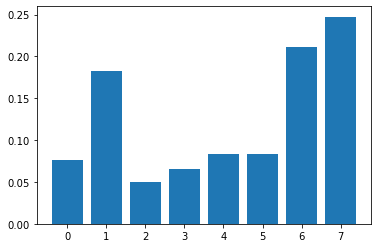

In [67]:
#### RandomForestRegressor feature Selection

from sklearn.ensemble import RandomForestRegressor
from matplotlib import pyplot


model = RandomForestRegressor()
model.fit(x, y)
importance = model.feature_importances_

for i,v in enumerate(importance):
	print('Feature: %0d, Score: %.5f' % (i,v))
# plot feature importance
pyplot.bar([x for x in range(len(importance))], importance)
pyplot.show()

Feature: 0, Score: 0.01092
Feature: 1, Score: 0.04382
Feature: 2, Score: 0.54881
Feature: 3, Score: 0.10909
Feature: 4, Score: 0.00128
Feature: 5, Score: 0.59094
Feature: 6, Score: 0.72512
Feature: 7, Score: 0.39320


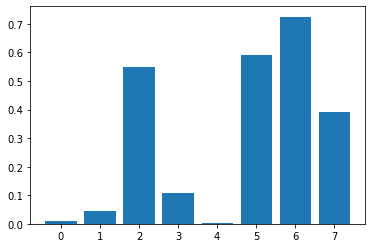

In [68]:
# permutation feature importance with knn for regression
from sklearn.neighbors import KNeighborsRegressor
from sklearn.inspection import permutation_importance
from matplotlib import pyplot

# define the model
model = KNeighborsRegressor()
# fit the model
model.fit(x, y)

# perform permutation importance
results = permutation_importance(model, x, y, scoring='neg_mean_squared_error')
# get importance
importance = results.importances_mean
# summarize feature importance
for i,v in enumerate(importance):
	print('Feature: %0d, Score: %.5f' % (i,v))
# plot feature importance
pyplot.bar([x for x in range(len(importance))], importance)
pyplot.show()

(21120, 5)


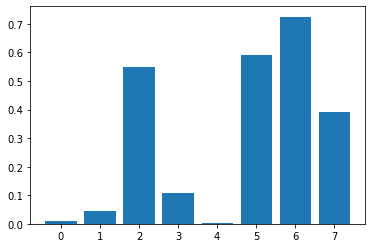

In [70]:
# pearson's correlation feature selection for numeric input and numeric output
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import f_regression

# define feature selection
fs = SelectKBest(score_func=f_regression, k=5)
# apply feature selection
X_selected = fs.fit_transform(x, y)
print(X_selected.shape)

importance = results.importances_mean
pyplot.bar([x for x in range(len(importance))], importance)
pyplot.show()